In [60]:
import re
def startsWithDateTime(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), (([0-9]|)[0-9]):([0-9][0-9]) ([a|p]m) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

def  tosplitauthor(s):
    try:
        author = s.split('-')[1].split(':')[0]
        print (author)
    except:
        author=None
        print (author,s)
    else:
        print (author)
    


In [61]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [62]:
 x=open("D:\Localgit\PythonWork\ChatAnalyzer\WhatsApp Chat with அண்ணனின் விழுதுகள் 👨_👨_👦_👦.txt", "r", encoding="utf8")

In [63]:
def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
    
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']
    
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    
    date, time = dateTime.split(', ') # date = '18/06/17'; time = '22:47'
    
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'
    
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message

In [64]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = "D:\Localgit\PythonWork\ChatAnalyzer\WhatsApp Chat with Trip - Reunion 2020 😎.txt"
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline()
        if not line: # Stop reading further if end of file has been reached
            parsedData.append([date, time, author, ' '.join(messageBuffer)])
            break
        #print (line)
        line = line.strip()# Guarding against erroneous leading and trailing whitespaces
        if startsWithDateTime(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                #print (messageBuffer)
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
            
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

In [65]:
import pandas as pd
import matplotlib
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.tail()

,Date,Time,Author,Message
0,07/07/2018,10:11 am,Sundaram Bnec,Alex notice this future is coming on whatsup
1,07/07/2018,10:23 am,Alex,Fraud da
2,07/07/2018,10:23 am,Alex,😭


In [89]:
#Row 4
word_list = pd.Series(' '.join(df.loc[~(df['Message'].str.contains('<Media.* | omitted>.$',regex=True))].Message).lower().split()).value_counts()[:10]

most=[('texts sent',author_value_counts.idxmax(),author_value_counts.max()),
           ('emoji sent',sent_emoji.idxmax(),sent_emoji.max()),
      ('media shared',author_media_messages_value_counts.idxmax(),author_media_messages_value_counts.max()),
      ('Used Word',word_list.idxmax(),word_list.max()),
      ('Used Emoji',emoji_list[0][0],emoji_list[0][1]),
      ('Texted Day',date_group.Message.count().idxmax(),date_group.Message.count().max())
     ]
print (most)
print (emoji_list)


longest_message,longest_msg =df['Word_Count'].max(),df.iloc[df.Word_Count.idxmax()][['Message','Author']]
#print ("""Longest Message is sent by : " """, longest_msg.Author, """" and the message has : """,longest_message,""" words""",longest_msg.Message)
print ("""Longest Message is sent by : " """, longest_msg.Author, """" and the message has : """,longest_message,""" words""")



ValueError: attempt to get argmax of an empty sequence

In [67]:
#Row 5
date_group=df.groupby('Date')

long_day_list = df.loc[df['Date']==date_group.Message.count().idxmax(),['Author','Message']]

long_day_list = [(author.Author,author.Message) for author in long_day_list.itertuples()]
long_day_list


[('Sundaram Bnec', 'Alex notice this future is coming on whatsup'),
 ('Alex', 'Fraud da'),
 ('Alex', '😭')]

Alex             2
Sundaram Bnec    1
Name: Author, dtype: int64


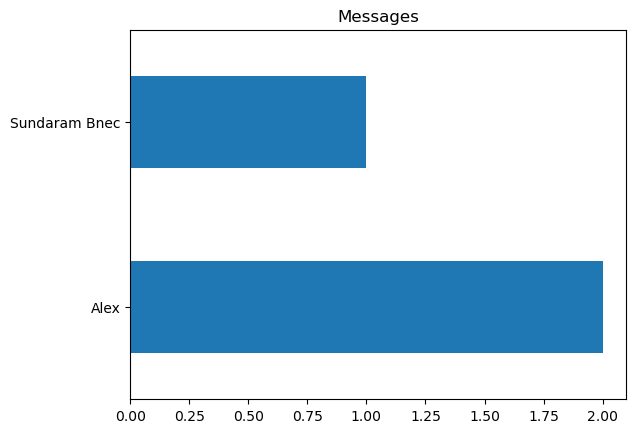

In [68]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot 
print (author_value_counts)
author_value_counts.plot.barh(title="Messages")

In [69]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()


,Date,Time,Author,Message


Series([], Name: Author, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

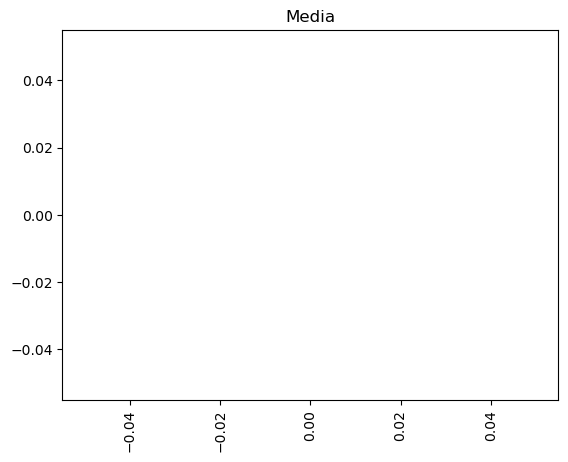

In [86]:
media_messages_df = df[df['Message'] == '<Media omitted>']
#print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
print (author_media_messages_value_counts)
#top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
#top_10_author_media_messages_value_counts.plot.barh()
author_media_messages_value_counts.plot.bar(title="Media")


In [71]:
import emoji,string
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
#df['Emoji_Count'] = df['Message'].apply(lambda s : sum([len(n) for n in s if emoji.demojize(n)!=n]))
df['Emoji_Count'] = df['Message'].apply(lambda s : emoji.emoji_count(s))
df['Emojis'] = df['Message'].apply(lambda s : [n for n in s if emoji.demojize(n)!=n 
                                               and emoji.demojize(n).count('skin_tone')==0 and emoji.demojize(n).count('male_sign')==0] )

df['Word_Count'] = df['Message'].apply(lambda s : len([w for w in s.split(' ') if w not in string.punctuation]))





In [72]:
total_members = list(df[df['Author'].notnull()].Author.unique())

print (df.Author.nunique(dropna=True))


print (df['Letter_Count'].sum(), df['Word_Count'].sum(),df['Emoji_Count'].sum(),df.Message.count(),df.Author.count())
"""df.head()

df[(df['Author'].notnull()) | (df['Changed_Author'].notnull())].Word_Count.sum()

author_media_messages_value_counts.sum()"""
max_date = pd.to_datetime(df['Date']+ ' ' +df['Time'],errors='ignore').max()
min_date = pd.to_datetime(df['Date']+ ' ' +df['Time'],errors='ignore').min()

date_diff = max_date-min_date


total = [('total messages', int(df.count().Author)),
             ('total media', int(author_media_messages_value_counts.sum())),
            ('total emojis', int(df['Emoji_Count'].sum())),
        ('total words',int(df['Word_Count'].sum())),
        ('total letters',int(df['Letter_Count'].sum())),
        ('total days',date_diff.days)]

print (total)
date_diff.to_timedelta64()

2
53 11 1 3 3
[('total messages', 3), ('total media', 0), ('total emojis', 1), ('total words', 11), ('total letters', 53), ('total days', 0)]


numpy.timedelta64(720000000000,'ns')

In [73]:
dic={'a':[1,2,3],'b':[]}
if not dic.get('b'):
     print ('j')

j


In [74]:
df.groupby(['Author','Emojis'])

In [75]:
continuous_columns = ['Letter_Count', 'Word_Count','Emoji_Count']
df[continuous_columns].describe()

,Letter_Count,Word_Count,Emoji_Count
count,3.000000,3.000000,3.000000
mean,17.666667,3.666667,0.333333
std,23.072350,3.785939,0.577350
min,1.000000,1.000000,0.000000
25%,4.500000,1.500000,0.000000
50%,8.000000,2.000000,0.000000
75%,26.000000,5.000000,0.500000
max,44.000000,8.000000,1.000000


In [76]:
#d=lambda s: s[0]+' '+s[1] if s[0] == 'You'
d = lambda s : len([w for w in s.split(' ') if w not in string.punctuation])

s='பாஜகவுக்கு பாஜகவுக்கு'
y='?'
d("""கருணாநிதி வெறுப்பு" என்பதை நாம் ஏன் விவாதிக்க வேண்டும்?*  *கருணாநிதி ஒழிக! - சம்பவம் 1*  "இந்தியாவின் எதிரிநாடு எது?" - என்று கேளுங்கள்… எல்லோரும் பாகிஸ்தான் என்று சொல்வார்கள்.  அப்படி சொல்பவர்களில் 99 விழுக்காட்டினர் தன் வாழ்நாளில் ஒரு பாகிஸ்தானியரைக்கூட சந்தித்திராதவர்கள்.  "இந்தியாவை ஒழித்துக்கட்டும் நோக்கோடு அணி அணியாய் வருவதாக சொல்லப்படும் தீவிரவாதிகளை பாகிஸ்தான்தான் உற்பத்தி செய்கிறது" - என நாம் தீர்மானமாக நம்புகிறோம்.  அதற்கான ஆதாரங்களை நாம் எப்போதும் கோருவதில்லை, அந்த முடிவை எடுக்க நம்மை தூண்டுவது "செய்தியின் நம்பகத்தன்மையல்ல, பாகிஸ்தான் நம் எதிரி" - எனும் தீர்மானமான வெறுப்புணர்வு.  அது ஒன்றும் நம் பிறவியிலேயே உருவாகிவிடவில்லை, அவை நம் பொதுக்கருத்தின் விளைவாக உருவாகின்றது அந்த பொதுக்கருத்தை ஊடகங்கள் உருவாக்குகின்றன.  கருணாநிதி ஒழிக! - சம்பவம் 2*  நாம் காணும் பெரும்பான்மை விளம்பரங்கள் அதன் தரம் குறித்தோ விலை குறித்தோ பேசுவதில்லை. ஒரு பொருளை விற்க இவையிரண்டும்தான் தேவை.  ஆனால் விளம்பரங்கள் உங்களுக்கு ஒரு மகிழ்ச்சியான உணர்வை உருவாக்குகின்றன (பற்கள் பாதுகாப்பாய் இருக்கும் என குளோசப் விளம்பரம் சொல்லி நீங்கள் எப்போதாவது பார்த்திருக்கிறீர்களா?). அந்த உணர்வு அப்பொருள் மீதான விருப்பத்தையும் அதன் வழியே அதற்கான தேவையையும் உங்களிடம் உருவாக்குகிறது.  நேரெதிராக பேரங்காடிகளில் உள்ள தள்ளுபடி வாசகங்கள் ஒரு லேசான பதற்றத்தை உங்களிடம் உருவாக்குகிறது (never before, never again, lowest price challenge, final price on this product இன்னும் பல).  இந்த பதட்டம் உங்கள் முடிவெடுக்கும் திறனை பாதிக்கிறது.  அதனால் தேவை குறித்த பரிசீலனையில்லாமல் நீங்கள் பொருளை வாங்க முனைகிறீர்கள். உங்கள் விருப்பத்துக்கும் வெறுப்புக்கும் உங்களிடம் நூறு காரணங்கள் இருக்கலாம். ஆனால் அவை முற்றாக உங்களிடமிருந்தே உருவானது என சொல்ல முடியாது  அதனை பிறரும் சேர்ந்தே கட்டமைக்கிறார்கள் என்பதை விளக்கவே மேலேயுள்ள உதாரணங்கள் தரப்பட்டிருக்கின்றன. இன்றைய சூழலில் இதனை நேர்த்தியாகவும் பரந்த அளவிலும் செய்ய இயலும்.  சுயமாக பேசவே அஞ்சி நடுங்கும் நரேந்திரமோடி எனும் லாயக்கற்ற மனிதன் மீதான கவர்ச்சி திட்டமிட்டே உருவாக்கப்பட்டது.  அவ்வாறே கருணாநிதியின் மீதான வெறுப்பும் பரவலான உணர்வாக மாற்றப்பட்டிருக்கிறது.  உடனே என்னை திட்ட ஆரம்பிக்கவேண்டாம், இன்னும் சில பத்திகளில் உள்ள இதன் காரணங்கள் மற்றும் விளைவுகள் பற்றிய கருத்துக்களுக்குப் பிறகு வசவுகளை வைத்துக்கொள்வது சரியாக இருக்கும்.  நாம் செய்திகளுக்காக ஊடகங்களை நம்புகிறோம், காரணம் நம்மால் எல்லா செய்திகளையும் ஆராய்ச்சி செய்து கொண்டிருக்க இயலாது. ஆகப்பெரும்பாலான மக்கள் ஊடகங்களின் கண்ணோட்டத்துடனேயே செய்திகளை உள்வாங்குகிறார்கள்.  கடன் தொல்லையால் செத்தானா? கள்ளக்காதலால் செத்தானா? - என உங்களை தீர்மானிக்க வைப்பது செத்தவனல்ல, தினத்தந்திதான்.*  ஊடகங்கள் செய்தியை தங்கள் கண்ணோட்டம் மற்றும் நோக்கம் சார்ந்தே தருகின்றன. அந்த நோக்கம் முதலாளிகளாலும் ஆசிரியர்களாலும் தீர்மானிக்கப்படுகிறது.  இந்த வாய்ப்பின் மூலமே ஊடகங்கள் நம் கருத்துக்களை உருவாக்குகின்றன. இங்கே யார் வெறுக்கப்பட வேண்டியவர் என்பதை ஊடகங்கள் தீர்மானிக்கின்றன.  ஒரு கொலை நடந்தால் ஊடகம் யாரை கொலைகாரன் என்று என்று சொல்கிறதோ அவரையே கொலையாளி என நம்மில் பெரும்பான்மையானவர்கள் கேள்விக்கிடமின்றி ஏற்றுக்கொள்வார்கள்_  *தீவிரவாதி ஆயிஷா எனும் பச்சைப்பொய்ச் செய்தியை ஆண்டுக்கணக்கில் நம்பியது தமிழகம்.  அது அம்பலமான பிறகு மன்னிப்பு கேட்கும் குறைந்தபட்ச அறம்கூட தமிழ்நாட்டு ஊடகங்களுக்கு இருக்கவில்லை* பெரும்பாலான இந்திய ஊடகங்களின் பிடி பார்ப்பனர்களிடம் இருக்கிறது. அவர்கள் தன்னியல்பாக ஜெயலலிதாவையும் பாஜகவையும் ஆதரிப்பவர்கள்.  அதனால்தான் சொந்த கட்சி அலுவலகத்துக்கு ஆண்டுக்கு இருமுறை வரும் ஜெயலலிதாவை சிறந்த நிர்வாகி என பல்லண்டுகாலமாக மக்களை நம்ப வைத்தார்கள்.  ஜெயலலிதாவின் நிஜ அடையாளம் பயம்.. பயம் மட்டுமே, அதனால்தான் கூடுமானவரை அவர் மக்கள் பார்வையில் படுவதை தவிர்க்கிறார்.  உலகின் ஆகப்பெரும்பாலான சர்வாதிகாரிகளின் நிஜ இயல்பு அதீத பயம்தான். அதனை மறைக்க அவர்கள் பயன்படுத்திய உத்தியே சர்வாதிகாரம்.  ஹிட்லருக்கு தன் உடலில் ஏதேனும் நோய் இருக்குமோ எனும் அச்சம் ஆட்டிப்படைத்தது, இலங்கையின் சமீபகால சர்வாதிகாரி மகிந்த ராஜபக்ச புலிகள் ஒழிக்கப்படும்வரை சுதந்திரதின கொடியையே தன் வீட்டு வளாகத்தில்தான் ஏற்றினார்.  ஜெயாவின் பயத்தை மறைத்து அவரை இந்த ஊடகங்கள்தான் தைரியலட்சுமியாக சித்தரித்தன. ஆட்சியில் இருக்கையில் ஜெயலலிதாவை நல்லவராக காட்டுவது என்பது கருவாட்டை மீனாக மாற்றுவதைக் காட்டிலும் சிரமம்.  அதனால்தான் அவருக்கு எதிரணியில் உள்ள கருணாநிதியை மிக மோசமானவராக காட்டி ஜெயாவின் கேட்டை சிறியதாக்க முற்படுகிறார்கள். மேலும் ஒரு காலத்தில் பார்ப்பன ஆதிக்கம் ஒழிக்கப்பட காரணமான பெரியாரின் குழுவில் இருந்தவர் எனும் பரம்பரைப் பகை இவர்களுக்கு இப்போதும் தொடர்கிறது.  ராஜாஜிக்குப் பிறகு நமக்கு வாய்த்த சொத்து ஜெயலலிதா – என்று வெளிப்படையாகவே சோ தனது சாதி திமிரை காட்டினார்.*  சாமானிய பார்ப்பனர்களில் பெரும்பாலானவர்கள் பாஜகவையும், அதிமுகவையும் ஆதரிப்பவர்கள்.  உங்கள் நடத்தையானது நம்பிக்கையில் இருந்து பிறக்கிறது" - என்பது ஒரு உளவியல் விதி.  அம்பானி பத்தாயிரம் கோடிக்கு வீடு கட்டிய செய்தியை பார்க்கிறீர்கள். அதே சமயத்தில் உங்கள் ஏரியா குப்பை வண்டிக்காரர் ஸ்மார்ட் போன் வைத்திருப்பதை பார்க்கிறீர்கள்.  மனசாட்சியோடு சொல்லுங்கள் நீங்கள் இதில் எதை அதிகம் விமர்சிப்பீர்கள்? பொறாமை என்பது நமக்கு இணையானவன் அல்லது கீழிருப்பவன் மீதுதான் வரும்.  தமிழகத்தில் பெரும்பான்மையானவர்கள் கருணாநிதியின் சாதியைவிட உயர்ந்த சாதி என என கருதப்படும் சாதியினர் அல்லது இணையான சாதியினர். தனக்கு கீழானவருக்கு பெரிய அதிகாரமும் திரண்ட சொத்தும் கிடைப்பது இவர்களின் பெரும்பான்மையானவர்களுக்கு ஏற்கவியலாததாக இருக்கிறது.  இந்தியாவின் சாதி அடுக்க்கின் மீதான நம்பிக்கை பலரது மூளையிலும் குடிகொண்டிருக்கிறது. அதுதான் ஜெயா சொத்துக்குவிப்பின் மீது அலட்சியத்தையும் கருணாநிதியின் சொத்துகள் மீதான ஆத்திரத்தையும் உருவாக்குகிறது.  பெருமளவு ஊடகங்கள் ஜெயாவுக்கு ஆதரவான நிலையை தக்கவைக்க கருணாநிதி எதிர்ப்பை தொடர்கின்றன. பெரும்பான்மை மக்களிடம் உள்ள சாதியுணர்வு அதற்கு துணைபோகிறது. இவை ஒரு வலுவான பொதுக்கருத்துக்கு போதுமானவை.  கிடா மீசை வீரத்தின் அடையாளம் என மக்களால் நம்பப்படுகிறது. ஆனால் பெரும்பாலான கிடாமீசைக்காரர்கள் அடிமைகளின் கூடாரமான அதிமுகவில் இருக்கிறார்கள். ஆக அவர்களின் வீரம் என்பது தன்னிலும் கீழான மக்களை அதட்டுவது மட்டும்தான்.  பெரும்பான்மை நடுத்தரவர்கள் கியூவில் காத்திருக்க வேண்டியிருக்கிறது எனும் சலிப்பில் அரசுத்துறையை வெறுப்பதாக சொல்வார்கள். ஆனால் அவர்கள்தான் பெசண்ட் நகர் முருகன் இட்லிக் கடையிலும் அமெரிக்க தூதரகத்திலும் வரிசையில் நிற்கிறார்கள்.  அவர்கள் கியூவை வெறுக்க காரணம் என்னிலும் கீழானவர்களோடு வரிசையில் நிற்பதா எனும் சலிப்புதான். மேலும் அமெரிக்க தூதரகத்திலும் டீஏவி பள்ளிவாயிலிலும் வரிசையில் நிற்பது கவுரவத்தை உயர்த்தும் செயல் என நீங்கள் நம்பவைக்கப் பட்டிருக்கிறீர்கள்.  ஆகவே ஓரிடத்தில் கியூவை வெறுக்கும் மக்கள் மற்றோர் இடத்தில் அதனை விரும்புகிறார்கள். இந்த முரண்பாடான விருப்பம் மற்றும் வெறுப்பைத்தான் நாம் அரசியலிலும் வெளிப்படுத்திக் கொண்டிருக்கிறோம்.  கருணாநிதி வெறுப்பு" - என்பதை நாம் ஏன் விவாதிக்க வேண்டும்?*  காரணம் இது கருணாநிதிக்கு எந்த நட்டத்தையும் உண்டாக்கப் போவதில்லை. ஆனால் கருணாநிதி வெறுப்பால் நாம் இழப்பது நிறைய.  ஜெயா மீதான பல தளங்களில் நிலவும் அச்சம், உப்பரிகையில் நின்று மட்டும் மக்களை பார்க்கும் அவரது மகாராஜாத்தனமான அரசியல், மக்களை சந்திப்பதில் காட்டும் அலட்சியம், பதில் சொல்லக்கூட விரும்பாத பொறுப்பின்மை என எல்லாவற்றையும் நாம் இயல்பாக8 எடுத்துக்கொள்ள காரணம் கருணாநிதி வெறுப்பு.  டெக்னிக்கலாக சொன்னால் வெறுப்பு மற்றும் கடுங்கோபத்தில் இருக்கையில் நம் கவனம் வெறுப்பவர் மீது மட்டும் இருக்கும் மற்ற பிரச்சனைகளின் தீவிரத்தை நாம் கணக்கிடத் தவறுவோம். ஒரு குடிமகனாக நம்மை தினம் தினம் சிக்கலுக்கு உள்ளாக்கும் பிரச்சினைகளின் ஆரம்பப்புள்ளி இவைதான்.  குமுதம் முதல் கோர்ட்வரை அவருக்கு விசுவாசமாக இருக்க அவரது சாதி காரணமாக இருக்கிறது என்றால் ஒரு சகிக்க முடியாத அரசை நடத்துகையிலும் அவர் குழாமுக்கு உள்ள இறுமாப்பிற்கு காரணமாக இருப்பது நமது கருணாநிதி வெறுப்பு.  கார்பரேட்டுக்களுக்கு எதிரான (தேர்தல்) அரசியல் கட்சியென்று ஒன்று இந்தியாவில் இல்லை. ஆனால் கார்ப்பரேட்டுக்கள் ஏன் பாஜகவை அதிகம் ஆதரிக்கிறார்கள்?*  காரணம் அங்கு அதிகாரம் ஓரிடத்தில் குவிந்திருக்கிறது. கட்சிக்குள் இருக்கும் எதிர்க்குரல் குறைவாக இருக்கிறது,  முட்டாள்களின் எண்ணிக்கை மிகஅதிகமாக இருக்கிறது, இந்தியாவை நிரந்தரமாக ஆள்வது கார்ப்பரேட்டுக்கள் மற்றும் அதிகாரிகள் கூட்டணிதான். இதில் கட்சிகள் பாத்திரம் வெறும் அடியாள் மட்டுமே.  அதிகாரிகளுக்கும் கம்பெனிகளுக்கும் குறைந்தபட்ச ஜனநாயகம்கூட இல்லாத கட்சிகள் மட்டுமே விருப்பத்தெரிவாக இருக்கின்றன. மக்களால் சந்திக்க முடியாத எதற்கும் பதிலளிக்க விரும்பாத தலைமையும் அதற்கு மண்டியிட்டு சேவகம் செய்யும் நிர்வாகிகளும் அவர்களது சுரண்டலை இலகுவாக்குகின்றன  திமுக பாஜக கூட்டணி எனும் அனுமானத்தை சுப்ரமணிய சாமி வெளியிட்ட உடனே சமூக ஊடகங்களில் உள்ள திமுகவினர் எதிர்குரல் எழுப்புகிறார்கள். பாஜகவோடு திமுக கூட்டணி வைத்தால்7 நான் முதல் முறையாக அதிமுகவுக்கு வாக்களிக்க வேண்டியிருக்கும் என்றுகூட ஒரு திமுககாரர் எழுதியிருந்தார  விரும்பினாலும் விரும்பாவிட்டாலும் திமுக தலைமைக்கு இத்தகைய எதிர்குரல்களுக்கு பதிலளிக்கவேண்டிய நிர்பந்தம் இருக்கிறது. ஆட்சியில் இருந்தாலும் இல்லாவிட்டாலும் மக்கள் சந்திக்க முடிகிற நபராக கருணாநிதி இருக்கிறார்.  இந்த இயல்பு அதிகாரிகளுக்கும் நிறுவனங்களுக்கும் அசௌகர்யமானதாக இருக்கிறது  அவர்களுக்கு ஒரேவீச்சில் முடிக்கிற ஆட்கள் தேவைப்படுகிறார்கள்.  ஒரு அறிவிப்பில் லட்சம் ஊழியர்களை வீட்டுக்கு அனுப்புகிற, ஒரே நாளில் 100% பஸ் கட்டணத்தை உயர்த்துகிற ஜெயாவின் இயல்புக்கு அடிப்படை மக்கள் மீதான அலட்சியம். அதுதான் உண்மையான ஆட்சியாளர்களுக்கு தேவையாய் இருக்கிறது.  பத்திரிக்கை படிக்கிற, மக்களை சந்திக்கிற வழக்கம் உள்ள கருணாநிதி மீது வெறுப்பும் பத்திரிக்கைகள் வாயிலாக பதில் சொல்லக்கூட விருப்பமில்லாத ஜெயா மீதான அச்சமும் பொதுக்கருத்தாவதால் அடுத்தகட்ட தலைவர்கள் ஜெயா பாணி தலைவராகவே முனைவார்கள்.  இப்போதுள்ள தலைவர்கள் பலருக்கும் அதுதான் உள்மன ஆசை!  தமிழக அரசியல் களத்தின் தலைமைகள் முழுக்க வெறும் ஜெயலலிதாக்களாகவே இருந்தால் எப்படியிருக்கும் என கற்பனை செய்து பாருங்கள்..  எல்லாவற்றுக்கும் மேலாக அச்சமூட்டக்கூடிய காரணி, பாஜகவுக்கு காத்திருக்கும் அதிமுக எனும் துணை அமைப்பு. பாஜக எல்லா மாநிலங்களிலும் தங்கள் துணையாய் இருந்த அமைப்புக்களின் வாக்கு வங்கியை தின்று வளர்ந்த கட்சி.  மஹாராஷ்டிராவில் சிவசேனாவோடு கூட்டணி அமைத்தார்கள், இப்போது அதனை பின்னுக்கு தள்ளி அங்கே பாஜக முதலிடத்துக்கு வந்திருக்கிறது. பீஹாரில் நிதிஷ், பஸ்வான் கட்சிகளோடு கூட்டணி அமைத்தார்கள், இப்போது பஸ்வான் ஒரு செல்லாக்காசு. ஆனால் பாஜக இரண்டாவது பெரிய சக்தியாக மாறியிருக்கிறது.  ஜெயாவின் அரசியல் செயல்பாடுகள் போயஸ்கார்டனுக்கு வெளியே ஒரு மணிநேரத்துக்கு மேல் நீடிக்க முடியாத சூழலில், சசிகலா கும்பலை வழிக்கு கொண்டுவந்து அதிமுகவை கைப்பற்ற பாஜகவுக்கு வெகுகாலம் ஆகாது.  சாதிச்சங்கங்களை கைப்பற்றி தங்கள் அடிப்படைவாதத்தை கிராமங்களுக்கு கொண்டு செல்ல ஆரம்பித்திருக்கிறது அக்கட்சி.  ஊடகங்கள் கிட்டதட்ட முற்றான பாஜக சார்பு நிலையில் இருக்கின்றன. புதிய தலைமுறை – பாஜக கூட்டணிக் கட்சியுடையது, தினமலர், தினமணி , தந்திடிவி ஆகியவை ஆர்.எஸ்.எஸ் பிரச்சாரக்கர்களினது  அதற்கு இன்னொரு ஜாக்பாட் ஆக இருக்கப்போவது அதிமுக கட்சிதான். இத்தனை அபாயகரமான சூழலில் வெகுமக்களின் கவனம் கருணாநிதியின் மீதான வெறுப்பில் நிலைகொள்வது நல்லதல்ல.  விடுதலை பெற்று 70 ஆண்டுகள் ஆகவிருக்கும் நிலையில் இன்னும் 70சதவிகிதம் மக்கள் வறுமையில் இருக்கிறார்கள்.  இதனை இந்திய அரசியல் அமைப்பின் தோல்வி என சொல்ல இயலாத நாம் எப்படி நாற்பதாண்டுகால திராவிட அரசியலால்தான் வீணாய் போனோம் என சொல்கிறோம்?  இவ்வாறே தனியார்மயம் சிறந்தது எனவும், ஜெயலலிதா சிறந்த நிர்வாகி எனவும் பல அடிப்படையற்ற கருத்துக்களை ஏற்றுக்கொள்ளுமாறு பயிற்றுவிக்கப் பட்டிருக்கிறோம்.  இவற்றை பயிற்றுவித்தவர்கள்தான் கருணாநிதி வெறுப்பையும் பயிற்றுவிக்கிறார்கள்.  பார்ப்பனர்கள் திமுகவை வெறுப்பதில் ஒரு காரணம் இருக்கிறது. அவர்களது பழைய பகை, தங்களது எதிர்கால நலனுக்கான பாஜகவின் வளர்ச்சி என பல்வேறு தேவைகளோடு அவர்கள் வெறுக்கிறார்கள்.  ஜெயாவின் எதேச்சதிகாரத்தால் அவர்களுக்கும் இழப்புக்கள் ஏற்படுகிறது, ஆனால் ஜெயா அவர்களது சாதி ஆதிக்கத்தின் முகம்  அதற்காக அவர்கள் எதையும் சகித்துக்கொள்வார்கள்.  ஆனால் தமிழகத்தின் வெகுமக்களது நிலை அவ்வாறானதல்ல. பார்ப்பனர்கள் போட்ட பாதையில் பயணிக்காத (பெரியாரும் கம்யூனிசமும் செல்வாக்கு செலுத்திய காலம்) ஆண்டுகளில்தான் ஓரளவுக்கு உருப்படியான திசையில் தமிழகம் பயணித்திருக்கிறது.  தமிழ்வழிக் கல்வி, தமிழில் அர்ச்சனை, சமூகநீதி போன்ற திராவிட இயக்க கொள்கைகளில் திமுக பெயரளவுக்குத்தான் செயல்படுகிறது என்பது தமிழ்தேசிய மற்றும் சில இந்நாள் & பழைய இடதுசாரி இயக்கத்தவர்கள் குற்றச்சாட்டு.  பெயரளவுக்குக்கூட செயல்படுபவர்கள் இருக்ககூடாது என்பது பார்ப்பன லாபியின் அஜெண்டா அதனால்தான் எத்தனை இணக்கமாக செயல்பட்டாலும் திமுகவை ஒழித்துக்கட்ட அவர்கள் முனைகிறார்கள் (சோ – துக்ளக் விழா பேச்சை பார்க்கவும்).  சமூகநீதி தொடர்பான எல்லா கேள்விகளையும் திமுகவை நோக்கி எழுப்புவது அதற்கான முழு உரிமையும் உள்ள கட்சி திமுக எனும் பிம்பத்தை உருவாக்கும் (அதில் கம்யூனிஸ்டுகளுக்கு பெரும் பங்குண்டு. இந்தி எதிர்ப்பு போராட்டத்திலும் கம்யூனிஸ்ட் இயக்கத்தவர்கள் பங்கு அதிகம்).  உண்மையில் சமூகநீதி சிந்தனை தமிழகத்தின் சொத்து, திமுக ஒருகாலத்தில் அதனை ஏற்றுக்கொண்ட கட்சி. யார் ஆட்சிக்கு வந்தாலும் ஊழல் நடக்கும் அந்த ஆட்சியும் மோடிக்கு பயந்துதான் நடக்கும்   அரசுப்பள்ளிகள் அழிந்துகொண்டே வரும், தமிழ் மொழிக்கும் அக்கதிதான் ஏற்படும்  இவையெல்லாம் மக்களின் போராட்டங்களின் வாயிலாக மட்டுமே களையப்படக்கூடியவை.  மதவாதம், ஊழல், தனியார்மயம், இயற்கைவள சுரண்டல் போன்ற பல்முனைத் தாக்குதலுக்கு தமிழகம் முகம் கொடுக்கிறது. இதில்  மிக எளிதாக இந்துத்துவமும் முதலாளித்துவமும் நம்மை ஒழித்துவிடும்.  பயிற்றுவிக்கப்பட்ட மிருகங்களைப் போல கைக்காட்டும் இடத்தில் பாய்வது முட்டாள்தனம்.*  *நிறைய வாசிப்போம், அதிகம் விவாதிப்போம் அதுதான் அறிவார்ந்த சமூகத்தின் இலக்கணம்!  பெரும்பான்மையான மக்களின் திமுக எதிர்ப்புக்கு காரணம் கலைஞர் அவரது சாதியைச் சார்ந்தவர் இல்லை என்பதே - @mathimaran , Unfortunately this is very true! In Villages if u asking a reason they will say this & experienced this too!""")

1325

In [77]:
import numpy
df['Letter_Count'].sum(), df['Word_Count'].sum(),df['Emoji_Count'].sum(),df.Message.count(),df.Author.count()

#df['Added_Authors'] = df.loc[(df['Author'].isnull())]
#df['Changed_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('changed|deleted',regex=True))].Message.str.split(' ',2).apply(lambda s: s[0]+' '+s[1] if s[0]!='You' and s[1]!='were' else s[0])
df['Changed_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('changed|deleted',regex=True))].Message.apply(lambda s : re.sub(r' (changed|deleted).*$','',s) if re.sub(r' (changed|deleted).*$','',s)!= 'You' else numpy.NaN)
df[df.Changed_Author.notnull()]

#df['Added_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('added',regex=True))].Message.str.split(' ',2).apply(lambda s: s[0]+' '+s[1] if s[0]!='You' else (s[0]+' '+s[1] if s[1]=='were' else s[0]))
df['Added_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('added',regex=True))].Message.apply(lambda s : re.sub(r' added.*$', '', s))
df[df.Added_Author.notnull()]

df['Removed_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('removed',regex=True))].Message.apply(lambda s : re.sub(r' removed.*$', '', s))
df[df.Removed_Author.notnull()]

df['Left_People'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('left$',regex=True))].Message.apply(lambda s : re.sub(r' left$', '', s))
df[df.Left_People.notnull()]



,Date,Time,Author,Message,Letter_Count,Emoji_Count,Emojis,Word_Count,Changed_Author,Added_Author,Removed_Author,Left_People


In [78]:
df[['Message','Word_Count','Emoji_Count','Author']].head()
#df.loc[(df['Message'].str.contains('Man who sold coffee'))]

,Message,Word_Count,Emoji_Count,Author
0,Alex notice this future is coming on whatsup,8,0,Sundaram Bnec
1,Fraud da,2,0,Alex
2,😭,1,1,Alex


Total Message Sent :  3
Users Contributed Count :  2
Users Contributed :  ['Sundaram Bnec' 'Alex']
8
Longest Message is sent by : "  Sundaram Bnec " and the message has :  8  words
Alex             2
Sundaram Bnec    1
Name: Author, dtype: int64


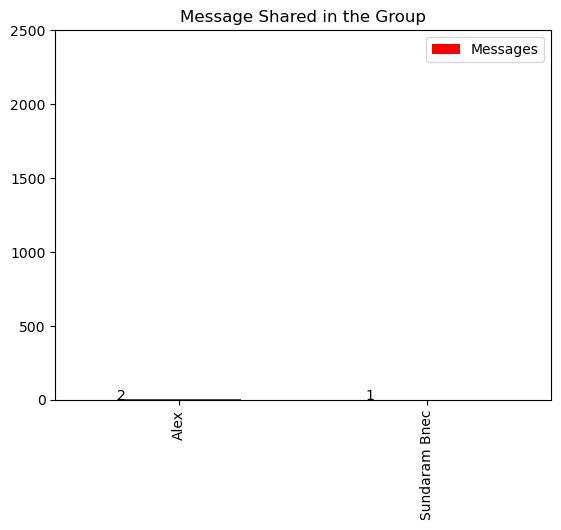

In [79]:
import matplotlib as mpl

mpl.style.use("default")
print ("Total Message Sent : ", df.count().Author)
print ("Users Contributed Count : ", df['Author'].nunique())
print ("Users Contributed : ", df['Author'].dropna().unique())
author_value_counts = df['Author'].value_counts() # Number of messages per author
ax = author_value_counts.plot.bar(color=['#FF0000'],title="Message Shared in the Group",legend=True,
                                   edgecolor="#00FF00", linewidth=0.0,yticks=[x for x in range(0,3000,500)])
print (df['Word_Count'].max())
longest_message,longest_msg =df['Word_Count'].max(),df.iloc[df.Word_Count.idxmax()][['Message','Author']]
#print ("""Longest Message is sent by : " """, longest_msg.Author, """" and the message has : """,longest_message,""" words""",longest_msg.Message)
print ("""Longest Message is sent by : " """, longest_msg.Author, """" and the message has : """,longest_message,""" words""")
#df.iloc[df.Emoji_Count.idxmax()].Message
#df['Author'].value_counts()
print (author_value_counts)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
ax.legend(['Messages'])


Total Emoji Sent :  1


{'Name': []}

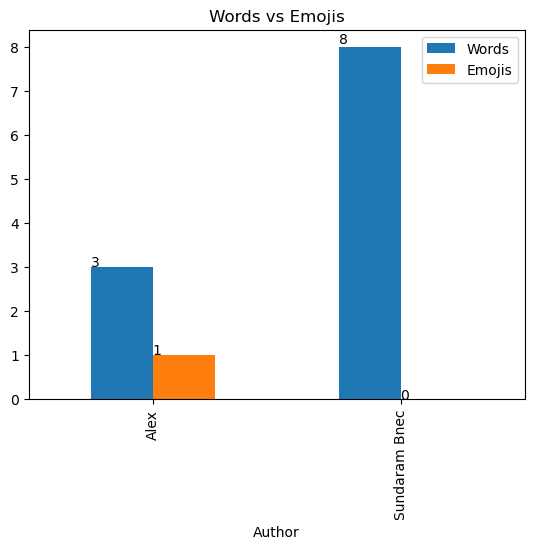

In [80]:
print ("Total Emoji Sent : ", df[df['Author'].notnull()].Emoji_Count.sum())
msg_emoji = df.groupby(['Author']).sum()['Emoji_Count']
group_name_emoji = df.groupby(['Changed_Author']).sum()['Emoji_Count']

sent_emoji = msg_emoji.add(group_name_emoji,fill_value=0).apply(lambda s :int(s))
#sent_emoji.plot.bar(sort_columns =True)
words_by_author = df.groupby(['Author']).sum()['Word_Count']
new_df = pd.concat([words_by_author,sent_emoji],axis=1,join="outer")

ex = new_df.plot.bar(title="Words vs Emojis")
for p in ex.patches:
    ex.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
ex.legend(['Words','Emojis'])

#print ("Users Contributed Count : ", df['Author'].nunique())
#print ("Users Contributed : ", df['Author'].dropna().unique())
#author_value_counts = df['Author'].value_counts() # Number of messages per author
#ax = author_value_counts.plot.bar(color=['#FF0000'],title="Message",legend=True,
#                                   edgecolor="#00FF00", linewidth=0.0,yticks=[x for x in range(0,3000,500)])
#print (df['Word_Count'].max())
#longest_message,longest_msg =df['Word_Count'].max(),df.iloc[df.Word_Count.idxmax()][['Message','Author']]

#df.iloc[df.Emoji_Count.idxmax()].Message
#df['Author'].value_counts()
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))"""
#words_by_author

sent_emoji.sort_values(ascending=False)
group_emoji_stacked_data

Total Words :  11
0
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


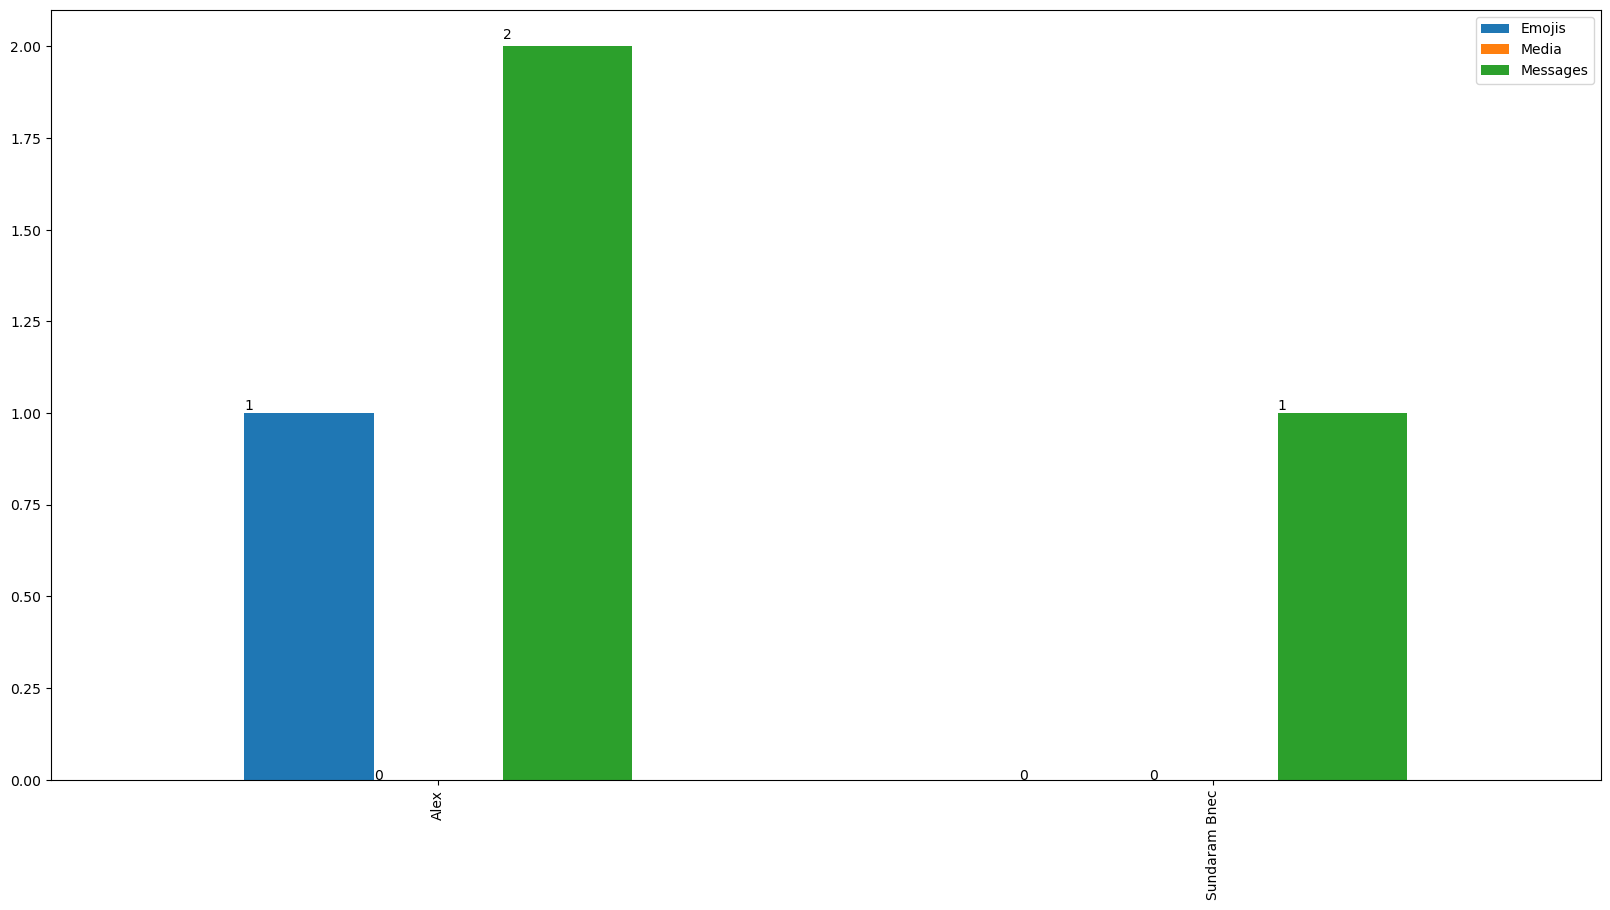

In [81]:
msg_word_by_author=df.groupby(['Author']).sum()['Word_Count']
changed_word_by_author = df.groupby(['Changed_Author']).sum()['Word_Count']
print ("Total Words : ",df[(df['Author'].notnull()) | (df['Changed_Author'].notnull())].Word_Count.sum())
words_by_author = msg_word_by_author.add(changed_word_by_author,fill_value=0).apply(lambda s: int(s))

#media_by_author=df.groupby(['Author']).sum()['Media_count']
author_media_messages_value_counts = author_media_messages_value_counts.apply(lambda s: int(s))
print (author_media_messages_value_counts.sum())
print (type(words_by_author))
print (type(sent_emoji))
print (type(author_media_messages_value_counts))
#new_df = pd.concat([words_by_author,sent_emoji,author_media_messages_value_counts,author_value_counts],axis=1,join="outer").astype(dtype='Int64')
new_df = pd.concat([sent_emoji,author_media_messages_value_counts,author_value_counts],axis=1,join="outer").astype(dtype='Int64')

ex = new_df.plot.bar(figsize=[20,10])
for p in ex.patches:
    ex.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
ex.legend(['Emojis','Media','Messages'])

#pd.concat([df.Word_Count,df.Emoji_Count],axis=1)

In [82]:

final_df = pd.concat([author_value_counts,sent_emoji,author_media_messages_value_counts,words_by_author],axis=1,join="outer").astype(dtype='Int64').fillna(0)
final_output = [[m,n[0],n[-3],n[-2],n[-1]] for m,n in [[n,list(j)] for n,j in final_df.iterrows()]]

final_output


[['Alex', 2, 1, 0, 3], ['Sundaram Bnec', 1, 0, 0, 8]]

In [83]:
import numpy
from collections import Counter
def emoji_per_person_usage_cal(emoji_list,emoji_values):
    emoji_stacked_data = {'Name':[]}
    for emo in emoji_list:
        for author,data in emoji_values:
            if emoji_stacked_data['Name'].count(author)==0:
                emoji_stacked_data['Name'].append(author)

            if not emoji_stacked_data.get(emo[0]):
                emoji_stacked_data[emo[0]]=[]
                emoji_stacked_data[emo[0]].append([ n for ind,val in data.items() for n in val if val!=[]].count(emo[0]))
            else:
                emoji_stacked_data[emo[0]].append([ n for ind,val in data.items() for n in val if val!=[]].count(emo[0]))
    return emoji_stacked_data


emoji_data = df[df.Emojis.apply(lambda s: s if s!=[] else None).notnull()]
emoji_list = Counter([n for ind,val in emoji_data.Emojis.items() for n in val]).most_common(10)


message_emoji=df.groupby(['Author']).Emojis
group_name_emoji=df.groupby(['Changed_Author']).Emojis

msg_emoji_stacked_data = emoji_per_person_usage_cal(emoji_list,message_emoji)

group_emoji_stacked_data = emoji_per_person_usage_cal(emoji_list,group_name_emoji)

#print (msg_emoji_stacked_data)
#print (group_emoji_stacked_data)

for key,value in group_emoji_stacked_data.items():
    if key!='Name':
        
        if sum(value)>0:
            #print (value)
            greater_value=[ind for ind,val in enumerate(value) if val>0]
            for val in greater_value:
                #print (group_emoji_stacked_data['Name'][value.index(val)],key)
                try:
                    msg_emoji_stacked_data['Name'].index(group_emoji_stacked_data['Name'][value.index(val)])
                except:
                    pass
                else:
                    name_col = msg_emoji_stacked_data['Name'].index(group_emoji_stacked_data['Name'][value.index(val)])
                    #print (name_col)
                    #print (msg_emoji_stacked_data[key][name_col])
                    msg_emoji_stacked_data[key][name_col]+=val
                    #print (msg_emoji_stacked_data[key][name_col])
emoji_stacked_data=[[m for m in msg_emoji_stacked_data.keys()]]

 


    

emoji_stacked_data.append((numpy.asarray([n for n in msg_emoji_stacked_data.values()],dtype=object).transpose()).tolist())
emoji_stacked_data
df[df.Emojis.apply(lambda s: s if s!=[] else None).notnull()]


,Date,Time,Author,Message,Letter_Count,Emoji_Count,Emojis,Word_Count,Changed_Author,Added_Author,Removed_Author,Left_People
2,07/07/2018,10:23 am,Alex,😭,1,1,[😭],1,NaN,NaN,NaN,NaN


In [84]:
s='😁😁😁😁😁😁😁😁 dai . cha😁i'

In [85]:
f=lambda s : sum([len(n) for n in s if emoji.demojize(n)!=n])
g=lambda s : len(s.split(' '))

In [ ]:
g(s)

In [ ]:
import emoji
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
df['Emoji_Count'] = df['Message'].apply(lambda s : sum([len(n) for n in s if emoji.demojize(n)!=n]))
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))

In [ ]:
days = [str(n).zfill(2) for n in range(1,29)]
cases = [3,6,7,29,30,31,34,40,47,62,62,74,82,100,114,129,143,169,194,249,332,396,499,536,657,727,887,987]

In [ ]:
func = lambda lst : [int(((n-lst[a-1])/lst[a-1])*100) for a,n in enumerate(lst) if a!=0 ]

In [ ]:
lst =[0]+func(cases)
for day,per in list(zip(days,lst)):
    print ('*Mar'+day +'* : *'+str(per) +"%* of increase")
import matplotlib.pyplot as plt
plt.xlabel("March")
plt.ylabel("% of Increase")
plt.plot(days,lst)


In [ ]:
[(m,n) for m,n in sent_emoji.items()]

In [ ]:
x="WhatsApp Chat with 👊 வாழு..!! வாழ விடு.!! 💦.txt"

In [ ]:
x.split("WhatsApp Chat with")[1].split('.txt')[0]